In [5]:
!pip install scikit-learn


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('market1.csv')
print(df)

     Unit price  Quantity   Tax 5%      Total    cogs   
0         74.69         7  26.1415   548.9715  522.83  \
1         15.28         5   3.8200    80.2200   76.40   
2         46.33         7  16.2155   340.5255  324.31   
3         58.22         8  23.2880   489.0480  465.76   
4         86.31         7  30.2085   634.3785  604.17   
..          ...       ...      ...        ...     ...   
995       40.35         1   2.0175    42.3675   40.35   
996       97.38        10  48.6900  1022.4900  973.80   
997       31.84         1   1.5920    33.4320   31.84   
998       65.82         1   3.2910    69.1110   65.82   
999       88.34         7  30.9190   649.2990  618.38   

     gross margin percentage  gross income  Rating  
0                   4.761905       26.1415     9.1  
1                   4.761905        3.8200     9.6  
2                   4.761905       16.2155     7.4  
3                   4.761905       23.2880     8.4  
4                   4.761905       30.2085     5.3

In [197]:
df.head()               ###for printing the first 5 rows using "head"

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [198]:
df.describe()                                   ##For getting description of the dataset i.e. Average,Maximum,Minimum etc

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [199]:
df.info()                               ##For checking whether the dataset has null values or not and getting about the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unit price               1000 non-null   float64
 1   Quantity                 1000 non-null   int64  
 2   Tax 5%                   1000 non-null   float64
 3   Total                    1000 non-null   float64
 4   cogs                     1000 non-null   float64
 5   gross margin percentage  1000 non-null   float64
 6   gross income             1000 non-null   float64
 7   Rating                   1000 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


In [129]:
df.isnull().sum()                                              ##We can also check the null values by using "isnull" method

Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [130]:
df= df.drop(['gross margin percentage'], axis=1)                                       ##for deleting a column

In [131]:
df.head()      ##for getting the first 5 rows

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,30.2085,5.3


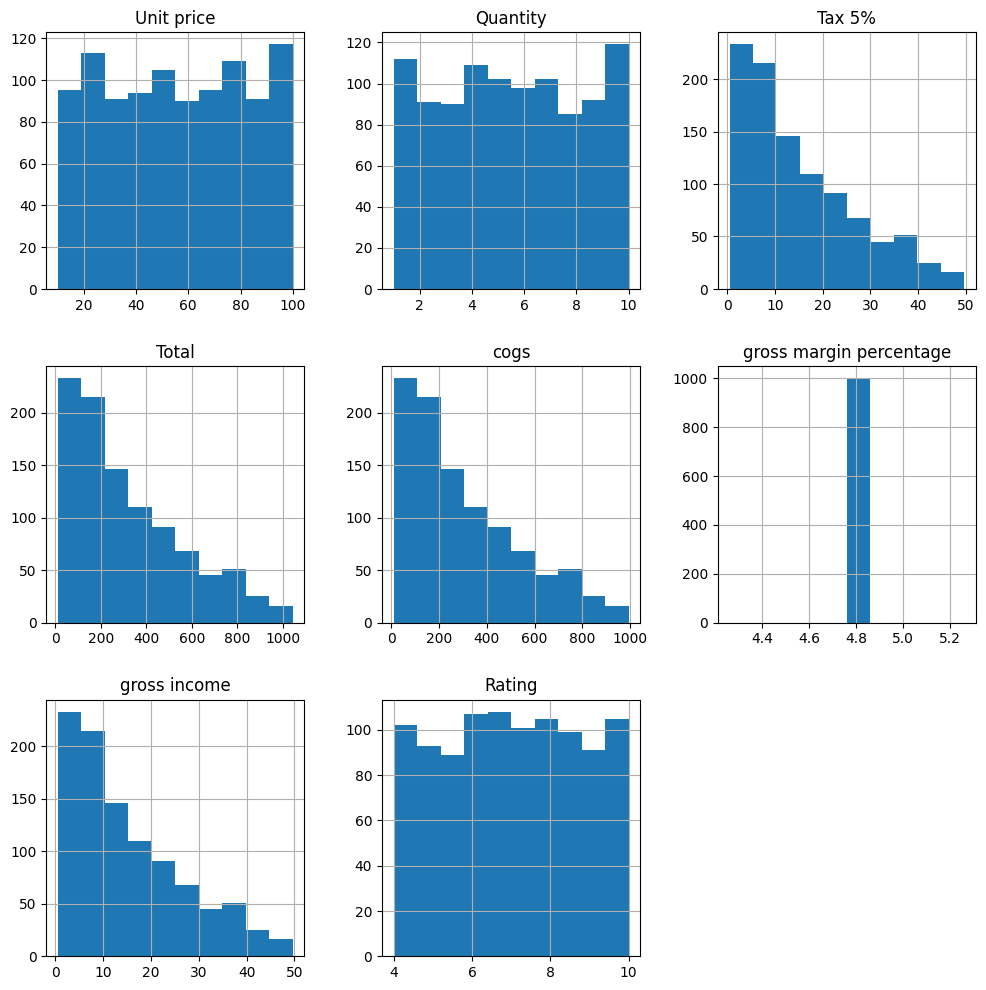

In [6]:
import matplotlib.pyplot as plt                 ##visualising the dataset in histograms using matplotlib library
df.hist(figsize=(12,12))
plt.show()

In [133]:
y=df['Rating']                                  ##Assigning the "Rating" column to y
y

0      9.1
1      9.6
2      7.4
3      8.4
4      5.3
      ... 
995    6.2
996    4.4
997    7.7
998    4.1
999    6.6
Name: Rating, Length: 1000, dtype: float64

In [160]:
x=df.drop('Rating',axis=1)                       
x

,Unit price,Quantity,Tax 5%,Total,cogs,gross income
0,74.69,7,26.1415,548.9715,522.83,26.1415
1,15.28,5,3.8200,80.2200,76.40,3.8200
2,46.33,7,16.2155,340.5255,324.31,16.2155
3,58.22,8,23.2880,489.0480,465.76,23.2880
4,86.31,7,30.2085,634.3785,604.17,30.2085
...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,2.0175
996,97.38,10,48.6900,1022.4900,973.80,48.6900
997,31.84,1,1.5920,33.4320,31.84,1.5920
998,65.82,1,3.2910,69.1110,65.82,3.2910


In [183]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [184]:
x_train


,Unit price,Quantity,Tax 5%,Total,cogs,gross income
675,83.77,2,8.3770,175.9170,167.54,8.3770
358,27.50,3,4.1250,86.6250,82.50,4.1250
159,93.39,6,28.0170,588.3570,560.34,28.0170
533,16.31,9,7.3395,154.1295,146.79,7.3395
678,58.95,10,29.4750,618.9750,589.50,29.4750
...,...,...,...,...,...,...
855,36.51,9,16.4295,345.0195,328.59,16.4295
871,56.50,1,2.8250,59.3250,56.50,2.8250
835,52.38,1,2.6190,54.9990,52.38,2.6190
792,97.37,10,48.6850,1022.3850,973.70,48.6850


In [182]:
x_test

,Unit price,Quantity,Tax 5%,Total,cogs,gross income
249,73.06,7,25.5710,536.9910,511.42,25.5710
353,27.00,9,12.1500,255.1500,243.00,12.1500
537,97.94,1,4.8970,102.8370,97.94,4.8970
424,16.28,1,0.8140,17.0940,16.28,0.8140
564,99.25,2,9.9250,208.4250,198.50,9.9250
...,...,...,...,...,...,...
684,23.08,6,6.9240,145.4040,138.48,6.9240
644,12.05,5,3.0125,63.2625,60.25,3.0125
110,16.49,2,1.6490,34.6290,32.98,1.6490
28,88.36,5,22.0900,463.8900,441.80,22.0900


In [181]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [154]:
print(x_train_pred)   ##Output

[7.15881107 6.94207906 6.86437554 7.1674297  6.83310564 6.97410457
 6.92331725 6.7632332  7.17933751 7.10123743 7.09801634 6.94440846
 7.01937665 6.50940801 7.1733222  7.02171042 6.95317914 6.98903483
 6.99872059 6.90839078 6.84437382 7.00857484 6.63639504 6.95480809
 7.10560566 7.12950012 6.97578595 7.03959137 6.85484794 6.90245155
 6.9563065  6.96722995 7.11938758 6.99002828 6.99024867 7.1695144
 7.09777017 6.69816535 7.05109625 7.06056885 6.97587606 7.03017787
 6.9487636  7.00470024 6.96495688 6.94329215 6.95947661 6.96676385
 7.03346436 6.85136705 6.81605607 6.68571682 6.95247831 6.91985711
 7.02722699 6.97847035 6.76028047 7.20003294 6.79236728 7.04025404
 6.74997652 7.17081686 7.00602181 7.12978801 6.86940187 6.96111948
 6.94538081 6.94643651 6.57883745 6.98584231 6.93026421 6.62967895
 6.96504137 6.97134068 6.91811714 6.93708506 7.06913318 7.08199276
 6.97508512 6.96102845 6.97561401 7.04802998 7.00613901 6.97113167
 6.99451957 6.80511943 6.85882118 6.98419497 6.97793126 7.11388

In [155]:
print(y_test_pred)        ##Output

[6.86012246 7.09049095 7.31083096 6.82738267 7.22507427 6.90175386
 7.07487228 7.02653733 6.58322778 7.09583096 7.13275043 6.80993437
 7.0876983  7.06332175 6.73775491 6.958425   7.12633332 6.82063019
 7.22558793 6.80257679 6.92142721 6.99209326 6.84949894 6.86602022
 6.99390022 7.00788973 7.14834341 7.0340098  6.97983777 7.03355446
 7.06870337 6.90882309 6.8807242  6.97419406 6.99882308 6.83478466
 6.99049061 6.900987   7.00144962 6.99279729 6.95679682 6.94898154
 6.90314082 6.7257336  7.11219569 6.86312872 6.94133961 7.25719108
 7.14784322 6.84895691 6.95664236 6.78008392 7.0357771  6.89504002
 7.00036825 6.66705752 6.64865091 6.95888591 6.95845719 6.6939006
 6.95017229 7.03437431 6.93370031 7.10351591 6.84614383 6.81376608
 7.12477498 6.97580505 6.8204688  6.89126226 6.98222647 7.03571656
 6.9332681  7.02088285 6.94999004 7.24440567 7.15751024 7.24174155
 6.72393429 6.86349625 7.0792105  7.09443494 7.0219392  6.87680418
 6.81166894 6.98411583 6.84907403 6.66864992 6.97273478 6.72346

[]

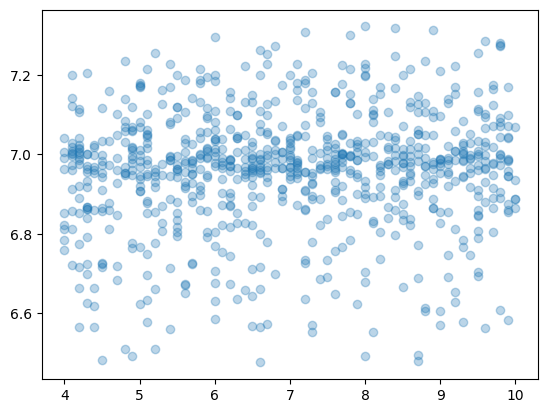

In [179]:
plt.scatter(x=y_train,y=y_train_pred,alpha=0.3)
plt.plot()

C:\Users\SWATHI\AppData\Local\Temp\ipykernel_8304\1367647900.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])


([<matplotlib.axis.XTick at 0x1def03b8f90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

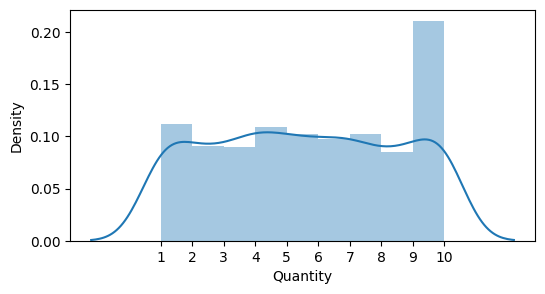

In [173]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(6,3))
sns.distplot(df['Quantity'])
plt.xticks(xdata)                           #visualization of how many customers buy the most

In [175]:
quantity=pd.DataFrame(df['Quantity'].value_counts())   #for getting how much quantity sold the most 
quantity

,count
Quantity,
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90
